<a href="https://colab.research.google.com/github/tranquynh310/Case-Taxi-Cancellation/blob/main/Python_Code_for_Case_21_5_Taxi_Cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 21.5 Taxi Cancellations



## Data Set Preparation





In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
currentPath = os.getcwd()

#change path
#os.chdir('/content/drive/Shareddrives/Python_test')
os.chdir('/content/drive/MyDrive/Python_test/dmba-datasets/dmba')

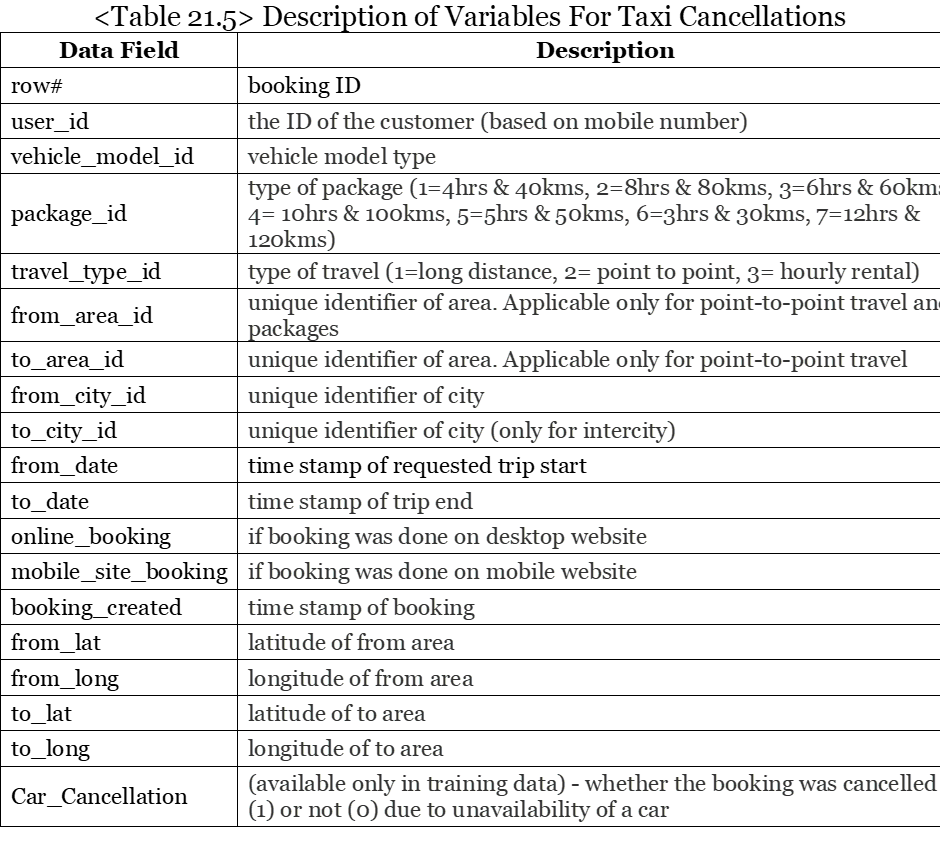

In [ ]:
!pip install dmba

%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from dmba import classificationSummary, gainsChart



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 1.9 MB/s 
no display found. Using non-interactive Agg backend


## Load the data

In [ ]:
taxi_df = pd.read_csv('Taxi-cancellation-case.csv')
taxi_df.head()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,1,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,01-1-13 22:33,NaN,0,0,01-1-13 8:01,13.028530,77.54625,12.869805,77.653211,0
1,2,17037,12,NaN,2,455.0,1330.0,NaN,NaN,01-1-13 12:43,NaN,0,0,01-1-13 9:59,12.999874,77.67812,12.953434,77.706510,0
2,3,761,12,NaN,2,814.0,393.0,NaN,NaN,01-2-13 0:28,01-3-13 0:00,1,0,01-1-13 12:14,12.908993,77.68890,13.199560,77.706880,0
3,4,868,12,NaN,2,297.0,212.0,NaN,NaN,01-1-13 13:12,NaN,0,0,01-1-13 12:42,12.997890,77.61488,12.994740,77.607970,0
4,5,21716,28,NaN,2,1237.0,330.0,NaN,NaN,01-1-13 16:33,NaN,0,0,01-1-13 15:07,12.926450,77.61206,12.858833,77.589127,0


In [ ]:
taxi_df.to_csv('taxi_df0.csv') # column type of date variable in Excel software should be transformed to "date type". At that time, the column type of from_date in the above dataframe file is equal to that of date variable on the csv file in Excel software.

In [ ]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           1752 non-null   float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         9985 non-null   float64
 6   to_area_id           7909 non-null   float64
 7   from_city_id         3706 non-null   float64
 8   to_city_id           339 non-null    float64
 9   from_date            10000 non-null  object 
 10  to_date              5822 non-null   object 
 11  online_booking       10000 non-null  int64  
 12  mobile_site_booking  10000 non-null  int64  
 13  booking_created      10000 non-null  object 
 14  from_lat             9985 non-null   float64
 15  from_long            9985 non-null   

## Data Visualization

Text(0, 0.5, 'count')

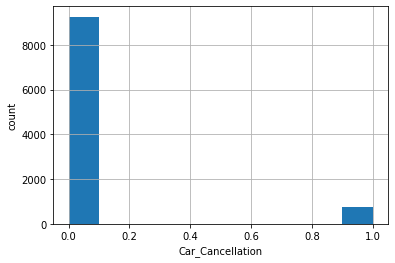

In [ ]:
ax = taxi_df.Car_Cancellation.hist()
ax.set_xlabel('Car_Cancellation')
ax.set_ylabel('count')


<ipython-input-94-bcbb57806b67>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, 'Avg. Car_Cancellation')

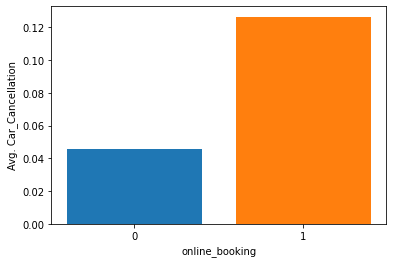

In [ ]:

## barchart of online_booking vs. Avg. Car_Cancellation
# compute mean Car_Cancellation per online_booking = (0, 1)

dataForPlot = taxi_df.groupby('online_booking').mean().Car_Cancellation
fig, ax = plt.subplots()
# ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'], width = 0.3)
ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('online_booking')
ax.set_ylabel('Avg. Car_Cancellation')

<ipython-input-87-924192641471>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, 'Avg. Car_Cancellation')

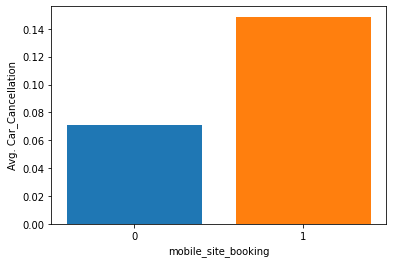

In [ ]:

dataForPlot = taxi_df.groupby('mobile_site_booking').mean().Car_Cancellation
fig, ax = plt.subplots()
# ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'], width = 0.3)
ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('mobile_site_booking')
ax.set_ylabel('Avg. Car_Cancellation')

<ipython-input-52-a587cffc7d06>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([1,2,3], False)


Text(0, 0.5, 'Avg. Car_Cancellation')

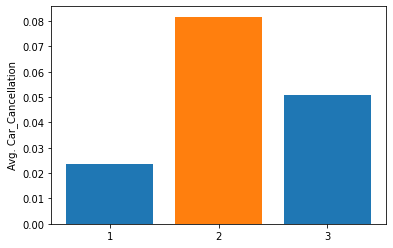

In [ ]:
## barchart of online_booking vs. Avg. Car_Cancellation
# compute mean Car_Cancellation per online_booking = (0, 1)

dataForPlot = taxi_df.groupby('travel_type_id').mean().Car_Cancellation
fig, ax = plt.subplots()
# ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'], width = 0.3)
ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'])
ax.set_xticks([1,2,3], False)
#ax.set_xlabel('travel_type_id')
ax.set_ylabel('Avg. Car_Cancellation')

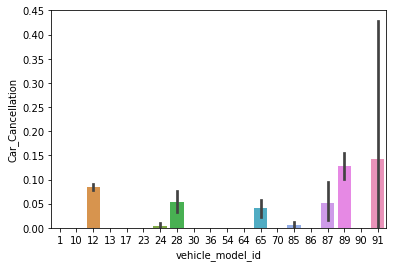

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="vehicle_model_id", y="Car_Cancellation", data=taxi_df)


### Data Preprocessing - Handling missing values and feature transformation

#### Set all NaN to zero

In [ ]:
# Set all NaN to zero
taxi_df = taxi_df.fillna(0)

# convert a number of columns to categories
taxi_df.vehicle_model_id = taxi_df.vehicle_model_id.astype('category')
taxi_df.package_id = taxi_df.package_id.astype('category')
taxi_df.travel_type_id = taxi_df.travel_type_id.astype('category')

# convert date to day of week and time
taxi_df.from_date = pd.to_datetime(taxi_df.from_date, infer_datetime_format=True)
taxi_df.to_date = pd.to_datetime(taxi_df.to_date, infer_datetime_format=True)
taxi_df.booking_created = pd.to_datetime(taxi_df.booking_created, infer_datetime_format=True)
taxi_df['from_date_Hour'] = taxi_df.from_date.dt.hour
taxi_df['to_date_Hour'] = taxi_df.to_date.dt.hour
taxi_df['booking_created_Hour'] = taxi_df.booking_created.dt.hour
taxi_df['from_date_DOW'] = taxi_df.from_date.dt.dayofweek # The day of the week with Monday=0, Sunday=6.
taxi_df['to_date_DOW'] = taxi_df.to_date.dt.dayofweek
taxi_df['booking_created_DOW'] = taxi_df.booking_created.dt.dayofweek

taxi_df.head()



,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,from_long,to_lat,to_long,Car_Cancellation,from_date_Hour,to_date_Hour,booking_created_Hour,from_date_DOW,to_date_DOW,booking_created_DOW
0,1,17712,12,0.0,2,1021.0,1323.0,0.0,0.0,2013-01-01 22:33:00,...,77.54625,12.869805,77.653211,0,22,0,8,1,3,1
1,2,17037,12,0.0,2,455.0,1330.0,0.0,0.0,2013-01-01 12:43:00,...,77.67812,12.953434,77.706510,0,12,0,9,1,3,1
2,3,761,12,0.0,2,814.0,393.0,0.0,0.0,2013-01-02 00:28:00,...,77.68890,13.199560,77.706880,0,0,0,12,2,3,1
3,4,868,12,0.0,2,297.0,212.0,0.0,0.0,2013-01-01 13:12:00,...,77.61488,12.994740,77.607970,0,13,0,12,1,3,1
4,5,21716,28,0.0,2,1237.0,330.0,0.0,0.0,2013-01-01 16:33:00,...,77.61206,12.858833,77.589127,0,16,0,15,1,3,1


In [ ]:
taxi_df.to_csv('taxi_df1.csv') # column type of date variable in Excel software should be transformed to "date type".

In [ ]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           1752 non-null   float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         9985 non-null   float64
 6   to_area_id           7909 non-null   float64
 7   from_city_id         3706 non-null   float64
 8   to_city_id           339 non-null    float64
 9   from_date            10000 non-null  object 
 10  to_date              5822 non-null   object 
 11  online_booking       10000 non-null  int64  
 12  mobile_site_booking  10000 non-null  int64  
 13  booking_created      10000 non-null  object 
 14  from_lat             9985 non-null   float64
 15  from_long            9985 non-null   

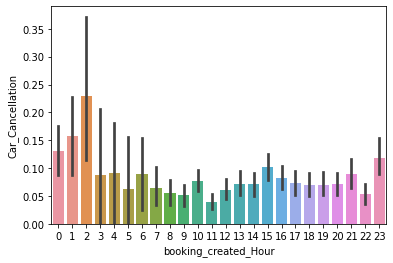

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="booking_created_Hour", y="Car_Cancellation", data=taxi_df)

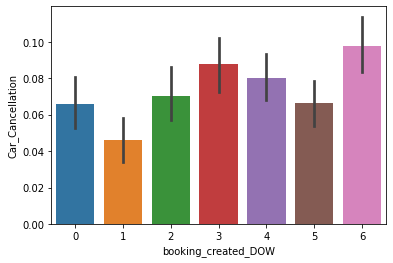

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

 # The day of the week with Monday=0, Sunday=6.

sns.barplot(x="booking_created_DOW", y="Car_Cancellation", data=taxi_df)

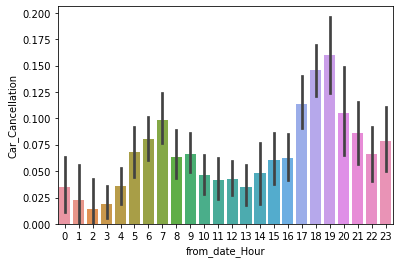

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="from_date_Hour", y="Car_Cancellation", data=taxi_df)

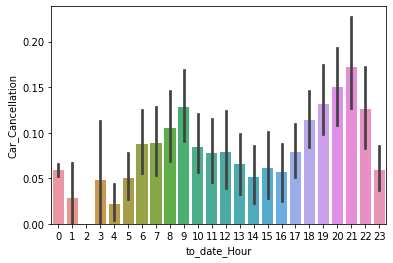

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="to_date_Hour", y="Car_Cancellation", data=taxi_df)

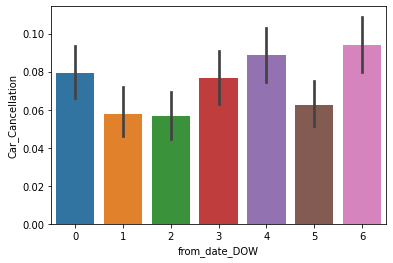

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="from_date_DOW", y="Car_Cancellation", data=taxi_df)

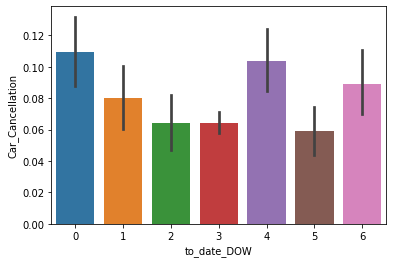

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="to_date_DOW", y="Car_Cancellation", data=taxi_df)

In [ ]:
import math

# compute trip length from GPS data
def distance(s_lat, s_lng, e_lat, e_lng):
    # approximate radius of earth in km
    R = 6373.0
    s_lat = s_lat * np.pi/180.0
    s_lng = np.deg2rad(s_lng)
    e_lat = np.deg2rad(e_lat)
    e_lng = np.deg2rad(e_lng)
    d = np.sin((e_lat - s_lat) / 2)**2 + np.cos(s_lat) * np.cos(e_lat) * np.sin((e_lng - s_lng) / 2)**2
    return 2 * R * np.arcsin(np.sqrt(d))

taxi_df['trip_length'] = distance(taxi_df.from_lat, taxi_df.from_long, taxi_df.to_lat, taxi_df.to_long)
taxi_df['trip_length'].head(10)

0      21.121893
1       6.012612
2      32.378385
3       0.826818
4       7.921406
5      26.321281
6       9.077398
7      19.955680
8    8672.376802
9       7.262777
Name: trip_length, dtype: float64

It is useful to look at the calculated trip_length critically. As you can see, most trip lengths are less than 100 km. However, there are a few cases, where the trip length is more than 8000 km. This is unrealistic and caused by the missing values for either start or end GPS co-ordinates. In this case, it is reasonable to either drop the trip length from the analysis or replace the unrealistic values with, for example the average trip length. We will use the second approach here.

In [ ]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row#                  10000 non-null  int64         
 1   user_id               10000 non-null  int64         
 2   vehicle_model_id      10000 non-null  category      
 3   package_id            10000 non-null  category      
 4   travel_type_id        10000 non-null  category      
 5   from_area_id          10000 non-null  float64       
 6   to_area_id            10000 non-null  float64       
 7   from_city_id          10000 non-null  float64       
 8   to_city_id            10000 non-null  float64       
 9   from_date             10000 non-null  datetime64[ns]
 10  to_date               10000 non-null  datetime64[ns]
 11  online_booking        10000 non-null  int64         
 12  mobile_site_booking   10000 non-null  int64         
 13  booking_created  

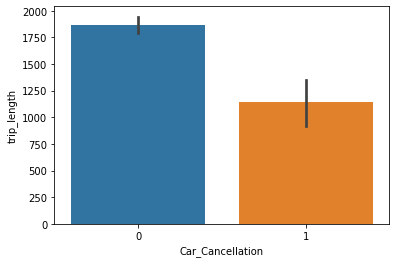

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Car_Cancellation", y="trip_length", data=taxi_df)

<ipython-input-65-23cb2a25e3d4>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0,1], False)


Text(0, 0.5, 'Avg. Car_Cancellation')

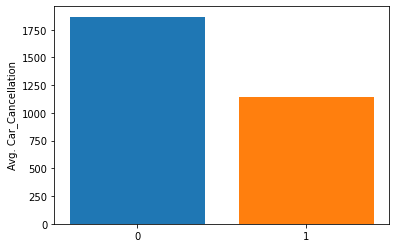

In [ ]:

dataForPlot = taxi_df.groupby('Car_Cancellation').mean().trip_length
fig, ax = plt.subplots()
# ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'], width = 0.3)
ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'])
ax.set_xticks([0,1], False)
#ax.set_xlabel('travel_type_id')
ax.set_ylabel('Avg. Car_Cancellation')


In [ ]:
average_trip_length = taxi_df.trip_length[taxi_df.trip_length < 8000].mean()
taxi_df.loc[taxi_df.trip_length > 8000, 'trip_length'] = average_trip_length

taxi_df['trip_length'].head(10)

0    21.121893
1     6.012612
2    32.378385
3     0.826818
4     7.921406
5    26.321281
6     9.077398
7    19.955680
8    17.228460
9     7.262777
Name: trip_length, dtype: float64

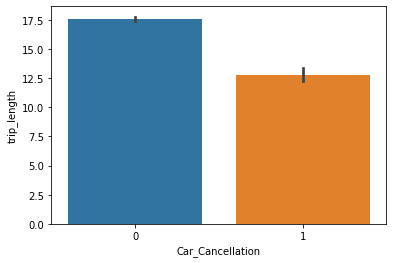

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Car_Cancellation", y="trip_length", data=taxi_df)

<ipython-input-68-23cb2a25e3d4>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0,1], False)


Text(0, 0.5, 'Avg. Car_Cancellation')

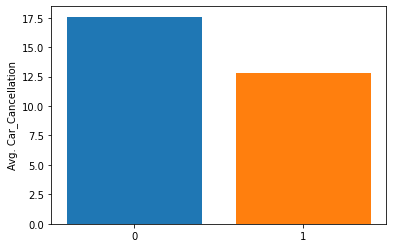

In [ ]:
dataForPlot = taxi_df.groupby('Car_Cancellation').mean().trip_length
fig, ax = plt.subplots()
# ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'], width = 0.3)
ax.bar(dataForPlot.index, dataForPlot, color=['tab:blue', 'C1'])
ax.set_xticks([0,1], False)
#ax.set_xlabel('travel_type_id')
ax.set_ylabel('Avg. Car_Cancellation')

In [ ]:
# Number of unique values
for column in taxi_df.columns:
    print(column, taxi_df[column].nunique()) # https://jaaamj.tistory.com/112
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

row# 10000
user_id 7044
vehicle_model_id 20
package_id 8
travel_type_id 3
from_area_id 523
to_area_id 480
from_city_id 3
to_city_id 68
from_date 7976
to_date 5333
online_booking 2
mobile_site_booking 2
booking_created 9611
from_lat 423
from_long 420
to_lat 391
to_long 388
Car_Cancellation 2
from_date_Hour 24
to_date_Hour 24
booking_created_Hour 24
from_date_DOW 7
to_date_DOW 7
booking_created_DOW 7
trip_length 3442


The columns `user_id`, `from_area_id`, `to_area_id` have a large number of unique values and are therefore less useful. `from_area_id` and `to_area_id` would also require a good understanding of the local geography. For a preliminary analysis, we can ignore these. We already converted the date columns `from_date`, `to_date`, and `booking_created` to more informative hour and day of week, and therefore also ignore these.

For a first analysis, we can also ignore the specific GPS information `from_lat`, `from_long`, `to_lat`, `to_long` and reduce this to the calculated `trip_length`.

For a first analysis, we also exclude `vehicle_model_id` and `package_id` as their value distributions is dominated by a single value each.

In [ ]:
print(taxi_df['from_city_id'].value_counts(), '\n', taxi_df['to_city_id'].value_counts())

0.0     6294
15.0    3679
1.0       27
Name: from_city_id, dtype: int64 
 0.0      9661
32.0      106
55.0       35
29.0       26
146.0      17
         ... 
88.0        1
170.0       1
142.0       1
4.0         1
61.0        1
Name: to_city_id, Length: 68, dtype: int64


Instead of using `from_city_id` and `to_city_id`, we derive a variable `within_city` that states if a trip was within a city or between cities. We can do the same for `from_area_id` and `to_area_id` giving a variable `within_area`

In [ ]:
taxi_df['within_city'] = 1.0 * (taxi_df['from_city_id'] == taxi_df['to_city_id'])
print(taxi_df['within_city'].value_counts())

taxi_df['within_area'] = 1.0 * (taxi_df['from_area_id'] == taxi_df['to_area_id'])
print(taxi_df['within_area'].value_counts())

1.0    6241
0.0    3759
Name: within_city, dtype: int64
0.0    9985
1.0      15
Name: within_area, dtype: int64


The `within_area` information is less useful and we will therefore ignore it.

We also exclude the information derived from `to_date` as it is essentially captured by the `from_date` information.

In [ ]:
taxi_df['from_city_id'].value_counts()

0.0     6294
15.0    3679
1.0       27
Name: from_city_id, dtype: int64

In [ ]:
taxi_df['to_city_id'].value_counts()



0.0      9661
32.0      106
55.0       35
29.0       26
146.0      17
         ... 
88.0        1
170.0       1
142.0       1
4.0         1
61.0        1
Name: to_city_id, Length: 68, dtype: int64

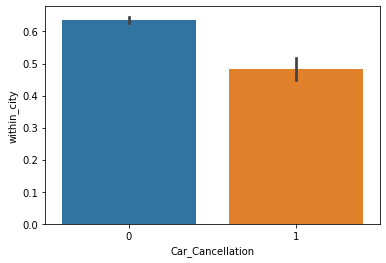

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Car_Cancellation", y="within_city", data=taxi_df)

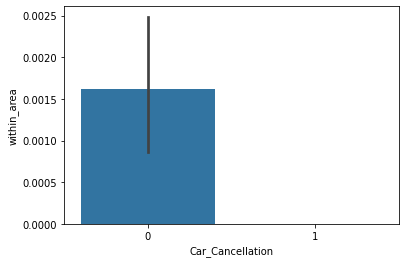

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Car_Cancellation", y="within_area", data=taxi_df)

## Step 4:
Fit several predictive models of your choice.  Do they provide information on how the predictor variables relate to cancellations?

In [ ]:
outcome = 'Car_Cancellation'
predictors = ['travel_type_id', 'within_city', 'online_booking', 'mobile_site_booking',
       'from_date_Hour', 'booking_created_Hour', 'from_date_DOW', 'booking_created_DOW', 'trip_length']

X = taxi_df[predictors]
y = taxi_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

train_X.shape, valid_X.shape

((6000, 9), (4000, 9))

In [ ]:
# Helper functions
def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y, model.predict(train_X))
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred)

### Step 4.1: Logistic regression model

In [ ]:
logit_reg = LogisticRegressionCV(penalty="l2", solver='saga', cv=5, max_iter=5000)
logit_reg.fit(train_X, train_y)
logit_reg_confusion = confusionMatrices(logit_reg, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.9253)

       Prediction
Actual    0    1
     0 5552    0
     1  448    0
Logistic regression - validation results
Confusion Matrix (Accuracy 0.9263)

       Prediction
Actual    0    1
     0 3705    0
     1  295    0


In [ ]:
help(LogisticRegressionCV)

### Step 4.2: Decision tree classifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)
dtree_confusion = confusionMatrices(dtree, 'Decision tree')

Decision tree - training results
Confusion Matrix (Accuracy 0.9968)

       Prediction
Actual    0    1
     0 5551    1
     1   18  430
Decision tree - validation results
Confusion Matrix (Accuracy 0.8740)

       Prediction
Actual    0    1
     0 3426  279
     1  225   70


####  RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
randomizedSearch = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
randomizedSearch.fit(train_X, train_y)
print('Initial score: ', randomizedSearch.best_score_)
print('Initial parameters: ', randomizedSearch.best_params_)


# Adapt grid based on result from initial random search
param_grid = {
    'max_depth': list(range(2, 16)),
    'min_samples_split': list(range(10, 22)),
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],
}
randomizedSearch = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
randomizedSearch.fit(train_X, train_y)
print('Improved score: ', randomizedSearch.best_score_)
print('Improved parameters: ', randomizedSearch.best_params_)

bestClassTree =randomizedSearch.best_estimator_

Initial score:  0.9253333333333332
Initial parameters:  {'min_samples_split': 80, 'min_impurity_decrease': 0.005, 'max_depth': 30}
Improved score:  0.9253333333333332
Improved parameters:  {'min_samples_split': 17, 'min_impurity_decrease': 0.001, 'max_depth': 4}


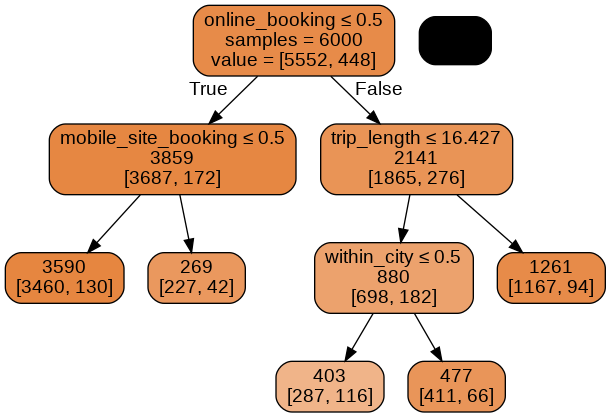

In [ ]:
from dmba import plotDecisionTree, classificationSummary, regressionSummary
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

## Step 5:
Report the predictive performance of your model in terms of error rates (the confusion matrix). How well does the model perform? Can the model be used in practice?

## Step 6:
Examine the predictive performance of your model in terms of ranking (lift). How well does the model perform? Can the model be used in practice?

Text(0.5, 1.0, 'All models')

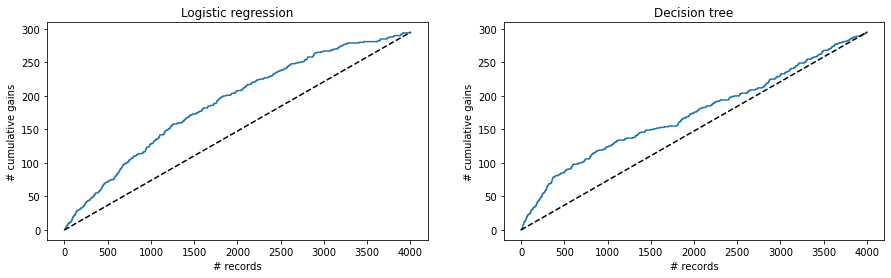

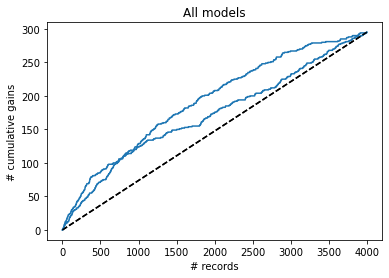

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

def modelGainsChart(model, title, ax=None):
    result = pd.DataFrame({
        'actual': valid_y,
        'prob': model.predict_proba(valid_X)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    ax = gainsChart(result.actual, ax=ax)
    ax.set_title(title)
    return ax

modelGainsChart(logit_reg, 'Logistic regression', axes[0])
modelGainsChart(dtree, 'Decision tree', axes[1])

ax = modelGainsChart(logit_reg, 'Logistic regression')
modelGainsChart(dtree, 'Decision tree', ax)
ax.set_title('All models')